<a href="https://colab.research.google.com/github/alexandrasouly/RL_implementations/blob/master/Google%20Colab%20rendering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gym rendering in Google Colab 

This notebook demonstrates rendering the episodes from OpenAI Gym environments, and allows the rendered episodes to be saved along with the batch statistics in a Google Colab notebook.

Works as of 25/07/2021

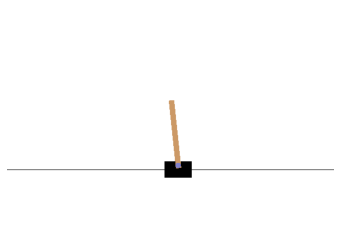

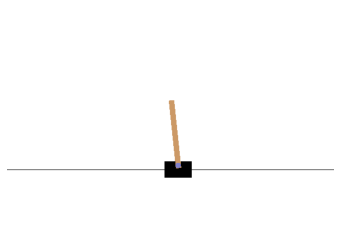

In [7]:
import gym
from IPython import display
!apt-get install -y xvfb x11-utils > /dev/null
!pip install pyvirtualdisplay
from pyvirtualdisplay import Display
import matplotlib.pyplot as plt
from time import time

d = Display()
d.start()
from gym import wrappers
env = gym.make('CartPole-v1')
env = wrappers.Monitor(env, './videos/' + str(time()) + '/', force = True, write_upon_reset=True, video_callable=lambda episode_id: episode_id%2==0)
o = env.reset()

img = plt.imshow(env.render('rgb_array'))
for _ in range(100):
    o, r, d, i = env.step(env.action_space.sample()) # Take action from DNN in actual training
    display.clear_output(wait=True)
    img.set_data(env.render('rgb_array'))
    plt.axis('off')
    display.display(plt.gcf())

    if d:
        env.reset()